In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.linear_model
import seaborn as sb
import statsmodels.api as sm
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model


//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [70]:
#Read file
search = pd.read_csv('Search data.csv')
display = pd.read_csv('display data.csv')
video = pd.read_csv('video data.csv')

In [62]:
def ExploratoryAnalysis(data):
    print "first 5 rows: \n" + str(data.head(5)) + "\n\n"
    print "statistical summary of data: \n\n" + str(data.describe()) + "\n\n"
    print "correlation: \n\n" + str(data.corr()) +"\n\n"
    columns = data.columns
    for i in range(0,len(columns)):
        print "columns " + str(columns[i]) + " has distinct values: \n" + str((data[columns[i]].value_counts())) + "\n\n"
    
    print "Pivot table: \n" +    str(pd.pivot_table(data, index = 'Month', aggfunc = np.sum)) + '\n\n'
    print "Graph: number of clicks distributed by Month \n" +  str(sb.factorplot( x='Month', y='Clicks', data=data, kind='bar', estimator = sum)) + "\n\n"
    print "Graph: spend distributed by Month \n" +  str(sb.factorplot( x='Month', y='Cost', data=data, kind='bar', estimator = sum)) + "\n\n"

first 5 rows: 
       Date  Month   Device Channel Campaign Type Media Type  Region  \
0  1/1/2013      1  Desktop  Google        Legacy     Search  Global   
1  1/1/2013      1   Mobile  Google        Legacy     Search   LATAM   
2  1/1/2013      1   Tablet  Google        Legacy     Search     AMS   
3  1/1/2013      1   Tablet  Google        Legacy     Search  Global   
4  1/2/2013      1   Mobile  Google        Legacy     Search    EMEA   

  Targeting   Cost  Clicks  
0     Brand  90.64      62  
1        NB   7.20       4  
2        NB  86.32      28  
3     Brand   9.26       6  
4        NB   1.90       6  


statistical summary of data: 

              Month          Cost        Clicks
count  49835.000000  49835.000000  49835.000000
mean       6.786134    744.762220    119.749253
std        3.442085   1888.371941    387.852678
min        1.000000      0.000000      2.000000
25%        4.000000     15.660000      6.000000
50%        7.000000     77.940000     20.000000
75%      

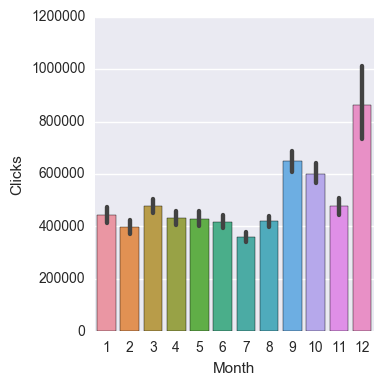

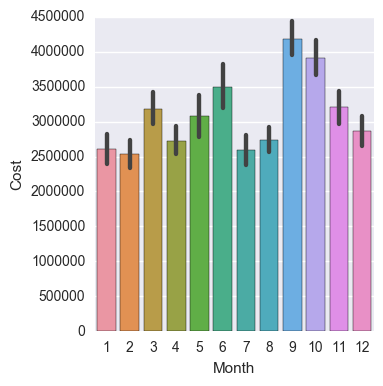

In [63]:

ExploratoryAnalysis(search)

(array([  1.54700000e+03,   5.40000000e+01,   2.00000000e+01,
          1.30000000e+01,   4.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          2.00000000e+00]),
 array([  2.00000000e+00,   2.33400000e+02,   4.64800000e+02,
          6.96200000e+02,   9.27600000e+02,   1.15900000e+03,
          1.39040000e+03,   1.62180000e+03,   1.85320000e+03,
          2.08460000e+03,   2.31600000e+03]),
 <a list of 10 Patch objects>)

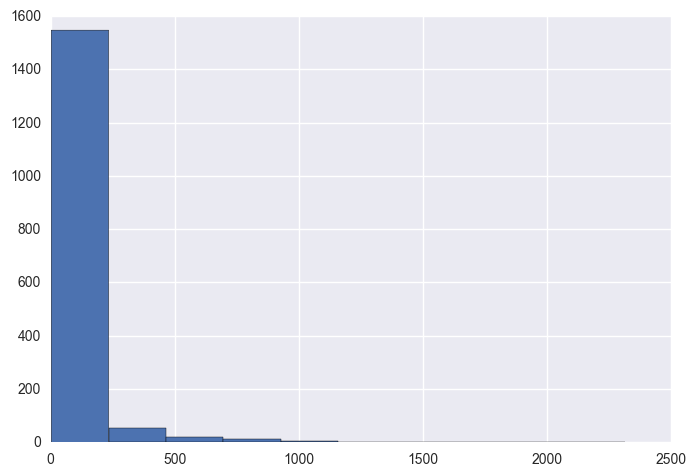

In [66]:
plt.hist(video.Clicks)

(array([ 545.,  181.,  224.,  243.,  245.,   75.,   46.,   49.,   30.,    6.]),
 array([ 0.69314718,  1.39859215,  2.10403711,  2.80948208,  3.51492704,
         4.22037201,  4.92581698,  5.63126194,  6.33670691,  7.04215187,
         7.74759684]),
 <a list of 10 Patch objects>)

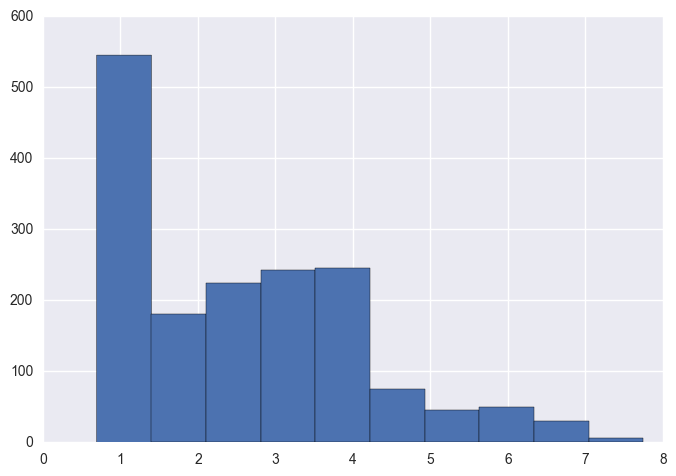

In [67]:
plt.hist(np.log(video.Clicks))

In [71]:
    display = display.join(pd.get_dummies(display['Device'],prefix="Device"))
    display = display.join(pd.get_dummies(display['Targeting'],prefix="Targeting"))
    display = display.join(pd.get_dummies(display['Region'],prefix="Region"))
    display = display.join(pd.get_dummies(display['Channel'],prefix="Channel"))
    display = display.join(pd.get_dummies(display['Campaign Type'],prefix="Campaign Type"))
    display = display.join(pd.get_dummies(display['Month'],prefix="Month"))

In [72]:
    video = video.join(pd.get_dummies(video['Device'],prefix="Device"))
    video = video.join(pd.get_dummies(video['Targeting'],prefix="Targeting"))
    video = video.join(pd.get_dummies(video['Region'],prefix="Region"))
    video = video.join(pd.get_dummies(video['Channel'],prefix="Channel"))
    video = video.join(pd.get_dummies(video['Campaign Type'],prefix="Campaign Type"))
    video = video.join(pd.get_dummies(video['Month'],prefix="Month"))

In [73]:
    search = search.join(pd.get_dummies(search['Device'],prefix="Device"))
    search = search.join(pd.get_dummies(search['Targeting'],prefix="Targeting"))
    search = search.join(pd.get_dummies(search['Region'],prefix="Region"))
    search = search.join(pd.get_dummies(search['Channel'],prefix="Channel"))
    search = search.join(pd.get_dummies(search['Campaign Type'],prefix="Campaign Type"))
    search = search.join(pd.get_dummies(search['Month'],prefix="Month"))

In [108]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

def LinearRegressionResult(data):
    X = data.drop(['Month','Clicks','Device','Date','Campaign Type','Media Type','Region','Targeting','Channel'],axis =1 )
    y = np.log(data["Clicks"])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    model = sm.OLS(y_train, X_train)
    results = model.fit()
    print 'MSE: ' + str(metrics.mean_squared_error(y_test,results.predict(X_test)))
    print(results.summary())
    

In [109]:
LinearRegressionResult(display)

MSE: 1.95549178368
                            OLS Regression Results                            
Dep. Variable:                 Clicks   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     1016.
Date:                Tue, 22 Nov 2016   Prob (F-statistic):               0.00
Time:                        22:58:55   Log-Likelihood:                -56867.
No. Observations:               32643   AIC:                         1.138e+05
Df Residuals:                   32608   BIC:                         1.141e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------

In [110]:
LinearRegressionResult(search)

MSE: 1.20974101206
                            OLS Regression Results                            
Dep. Variable:                 Clicks   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     2124.
Date:                Tue, 22 Nov 2016   Prob (F-statistic):               0.00
Time:                        22:58:58   Log-Likelihood:                -60548.
No. Observations:               39868   AIC:                         1.212e+05
Df Residuals:                   39837   BIC:                         1.214e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Cos

In [111]:
LinearRegressionResult(video)

MSE: 1.02842711432
                            OLS Regression Results                            
Dep. Variable:                 Clicks   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     95.36
Date:                Tue, 22 Nov 2016   Prob (F-statistic):          1.74e-237
Time:                        22:58:58   Log-Likelihood:                -1836.3
No. Observations:                1315   AIC:                             3715.
Df Residuals:                    1294   BIC:                             3823.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Cos

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

def DecisionTree(data):
#     data['Cost'] = np.log(data["Cost"])
    X = data.drop(['Month','Clicks','Device','Date','Campaign Type','Media Type','Region','Targeting','Channel'],axis =1 )
    y = np.log(data["Clicks"])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    dt = DecisionTreeRegressor()
    dt.fit(X_train, y_train)
    print 'MSE: ' + str(metrics.mean_squared_error(y_test,dt.predict(X_test)))
    print 'accuracy = ' + str(dt.score(X_test,y_test))
    feature_importances_array = dt.feature_importances_

    # Put the features themselves in a list
    features_array = X.columns.values 

    # Turn these into a Data Frame
    feature_importances_df = pd.DataFrame({'importances' : feature_importances_array, 'features' : features_array})
    
#     print feature_importances_df.sort(columns='importances', ascending=False)
    return dt

In [36]:
def DT_predict(data):
    dt = DecisionTree(data)
    X = data.drop(['Month','Clicks','Device','Date','Campaign Type','Media Type','Region','Targeting','Channel'],axis =1 )
    test_data = X[X['Month_12'] == 1]
    test_data['predicted_clicks'] = np.exp(dt.predict(test_data))
    print 'actual CPC: ' + str(data[data['Month'] == 12]['Cost'].sum()/data[data['Month'] == 12]['Clicks'].sum())
    print 'predict CPC: ' + str(test_data['Cost'].sum()/test_data['predicted_clicks'].sum())

In [37]:
DT_predict(display)

MSE: 0.361432138909
accuracy = 0.908554000827
actual CPC: 0.145915385398
predict CPC: 0.145841055423


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

def RandomForrest(data):
#     data['Cost'] = np.log(data["Cost"])
    X = data.drop(['Month','Clicks','Device','Date','Campaign Type','Media Type','Region','Targeting','Channel'],axis =1 )
    y = np.log(data["Clicks"])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
#     data['predict_clicks'] = rf.predict(X_test)
    print 'MSE: ' + str(metrics.mean_squared_error(y_test,rf.predict(X_test)))
    print 'accuracy = ' + str(rf.score(X_test,y_test))    
    feature_importances_array = rf.feature_importances_

    # Put the features themselves in a list
    features_array = X.columns.values 

    # Turn these into a Data Frame
    feature_importances_df = pd.DataFrame({'importances' : feature_importances_array, 'features' : features_array})
    
#     print feature_importances_df.sort(columns='importances', ascending=False)
    return rf

In [15]:
def RF_predict(data):
    rf = RandomForrest(data)
    X = data.drop(['Month','Clicks','Device','Date','Campaign Type','Media Type','Region','Targeting','Channel'],axis =1 )
    test_data = X[X['Month_12'] == 1]
    test_data['predicted_clicks'] = np.exp(rf.predict(test_data))
    print 'actual CPC: ' + str(data[data['Month'] == 12]['Cost'].sum()/data[data['Month'] == 12]['Clicks'].sum())
    print 'predict CPC: ' + str(test_data['Cost'].sum()/test_data['predicted_clicks'].sum())

In [16]:
RF_predict(display)

MSE: 0.237450535312
accuracy = 0.939922604777
actual CPC: 0.145915385398
predict CPC: 0.15292398824


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
RF_predict(video)

MSE: 0.272367808788
accuracy = 0.900148086576
actual CPC: 3.65036467236
predict CPC: 3.54211624319


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
RF_predict(search)

MSE: 0.238607984449
accuracy = 0.924108616528
actual CPC: 3.31646463174
predict CPC: 3.87391549227


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
